In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
df = pd.read_csv('../data/San_Francisco_restaurant_reviews_sentences.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
df.head()

,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length,sentences,sentence_count,review_id,sentence
0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,Absolutely amazing.
1,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,I've dined here at least 6 times since moving ...
2,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,Every experience has been great and those I re...
3,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,1,So good we went twice in one week!
4,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,1,After a recommendation from the barista by our...


## Checkign and getting rid of useless sentences

In [5]:
df['sentence'].value_counts().iloc[0:30]

:)                    343
*                     285
                      260
Food:                 164
Wow!                  142
Wow.                  127
Highly recommend!     124
Highly recommend.     106
2.                     97
Yes.                   94
Delicious!             92
Yum!                   91
Delicious.             90
-                      90
Service:               87
Amazing.               80
Tip:                   78
So good!               77
Great service.         76
&                      74
FOOD:                  74
Love this place!       67
3.                     66
Amazing!               65
Cash only.             63
I love this place.     63
Yum.                   62
So good.               62
                       60
Service was great.     58
Name: sentence, dtype: int64

In [6]:
# Removing sentences that are just a number and a period
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\d.$', '', x))

In [7]:
# Removing sentences that aren't alphanumeric characters
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\W+$', '', x))

In [8]:
# Removing sentences that are just a word and a colon
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\w+:$', '', x))

In [9]:
print(df.shape)
df = df[df['sentence'] != '']
print(df.shape)

(468444, 9)
(465682, 9)


In [10]:
df['sentence'].value_counts().iloc[0:60]

Wow!                          142
Wow.                          127
Highly recommend!             124
Highly recommend.             106
Yes.                           94
Delicious!                     92
Yum!                           91
Delicious.                     90
Amazing.                       80
So good!                       77
Great service.                 76
Love this place!               67
Amazing!                       65
Cash only.                     63
I love this place.             63
Yum.                           62
So good.                       62
Service was great.             58
No.                            55
Enjoy!                         49
Love this place.               48
Highly recommended.            48
Great food.                    48
Highly recommended!            47
Lol.                           46
You won't regret it.           44
Thank you!                     43
The food was delicious.        40
Service was good.              40
It was delicio

## Lemmatizing sentences and getting the count of occurences of each of the words

In [11]:
# Create lemmatizer and tokenizer
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [12]:
# lemmatizing and tokenizing sentences
df['lemmatized'] = df['sentence'].apply(lambda x: [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(x.lower())])

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Removing stopwords from lemmatized tokens
df['lemmatized'] = df['lemmatized'].apply(lambda x: [token for token in x if token not in stopwords.words('english')])

In [15]:
# Create the word_df by extrending all of the lemmatized lists

word_df = []

# Going through each row and appending the words to the word df
for idx, row in df.iterrows():
    word_df.extend(row['lemmatized'])
                   
word_df = pd.DataFrame(word_df, columns=['word'])

In [16]:
# Changing df to be a count of each word found
word_df = word_df['word'].value_counts()

In [17]:
word_df.head()

wa       125204
food      33783
good      32636
place     29957
time      22641
Name: word, dtype: int64

In [18]:
word_df.shape

(47126,)

In [21]:
word_count_greater_than_1000 = word_df[word_df >= 1000]
word_count_greater_than_1000.shape

(635,)

In [109]:
def barchart_of_words(counts, words, title):
    plt.figure(figsize = (10, 8))
    y_pos = np.arange(30)
    plt.rc('axes', titlesize=30) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15) 
    plt.barh(y_pos ,counts)
    plt.yticks(y_pos, words)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.savefig(f'../images/{title}')

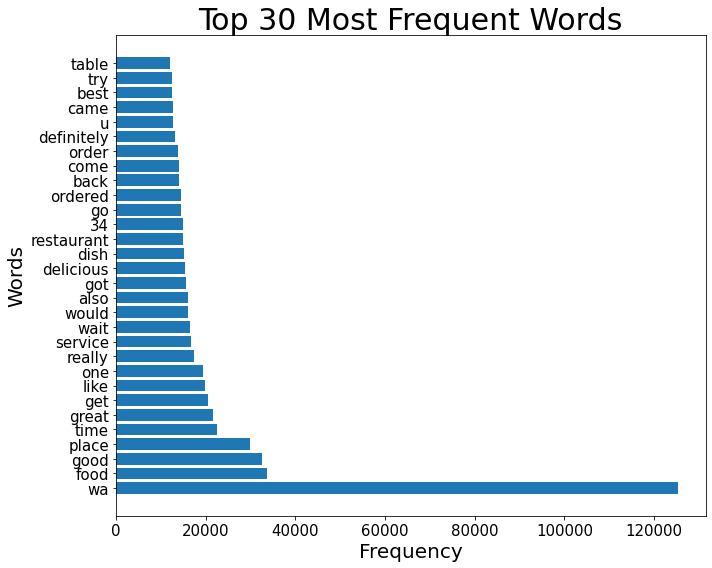

In [110]:
barchart_of_words(word_count_greater_than_1000[0:30], word_count_greater_than_1000[0:30].index,
                  'Top 30 Most Frequent Words')

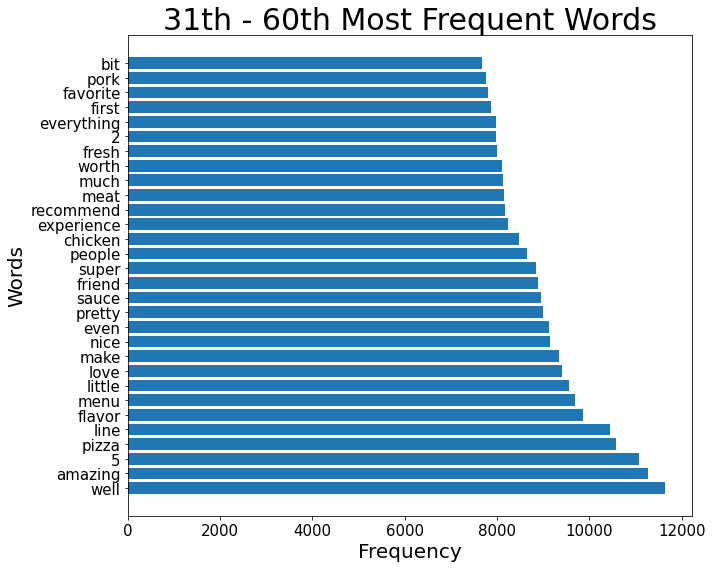

In [111]:
barchart_of_words(word_count_greater_than_1000[30:60], word_count_greater_than_1000[30:60].index,
                  '31th - 60th Most Frequent Words')

## Examining words and creating a key words list

In [36]:
for idx, value in zip(word_count_greater_than_1000[600:].index, word_count_greater_than_1000[600:]):
    print(idx, value)

surprised 1082
loud 1080
card 1079
fusion 1078
excited 1075
wife 1074
bone 1073
unfortunately 1072
opened 1069
authentic 1068
vegetable 1066
craving 1066
cheap 1060
seems 1058
several 1056
banana 1055
carne 1055
magic 1055
please 1053
truly 1052
coconut 1045
impressed 1044
croissant 1033
taking 1031
apple 1029
business 1022
tiny 1022
host 1010
fact 1010
fluffy 1005
11 1004
disappoint 1002
today 1001
rather 1001
man 1000


In [132]:
food_words = ['food', 'delicious', 'dish' ,'ordered', 'pizza', 'flavor', 'menu',
             'sauce', 'chicken', 'meat', 'fresh', 'pork', 'burrito', 'bread', 'taste',
             'fried', 'salad', 'dinner', 'cheese', 'drink', 'oyster', 'sweet', 'try', 
             'fish', 'egg', 'potato', 'sandwich', 'rice', 'spicy', 'seafood', 'shrimp',
             'clam', 'coffee', 'dessert', 'crab', 'portion', 'toast', 'tasty', 'bacon', 'taco',
             'soup', 'beef', 'plate', 'course', 'crispy', 'chip', 'dumpling', 'cooked', 'tasted',
             'lunch', 'quality', 'flavorful', 'cream', 'huge', 'excellent', 'perfectly', 'noodle',
             'eating', 'wine', 'appetizer', 'chowder', 'slice', 'served', 'roll', 'rib', 'large', 'piece',
             'pancake', 'tender', 'style', 'fry' , 'bean', 'benedict', 'cut', 'cocktail', 
             'steak', 'ramen', 'soft', 'chocolate', 'light', 'lemon', 'crust', 'yummy', 'sausage',
             'entree', 'texture', 'sushi', 'filling', 'bowl', 'grilled', 'wing', 'lamb', 'korean', 'butter',
             'tea', 'ordering', 'ingredient', 'mushroom', 'tomato', 'onion', 'salmon', 'salsa',
             'curry', 'water', 'broth', 'cioppino',' veggie', 'mexican', 'ate', 'cold' , 'duck',
             'creamy', 'belly', 'mouth', 'juicy', 'salty', 'burger', 'ice', 'thick', 'rich', 'thai', 'scallop'
             'chef', 'savory', 'vegan', 'avocado', 'shared', 'pasta', 'spice', 'red', 'crunchy', 
             'chop', 'pepper', 'yum', 'vegetarian', 'seasoned', 'thin', 'roasted', 'kimchi', 'beignet',
             'combo', 'tart', 'heavy', 'risotto', 'stuffed', 'italian', 'bakery', 'generous', 'asada',
             'mussel', 'lobster', 'sour', 'serving', 'pastry', 'ricotta', 'topping' , 'spinach', 'fusion',
             'bone', 'authentic', 'vegetable', 'craving', 'carne', 'banana', 'coconut', 'croissant', 'apple',
             'fluffy', 'hungry']

service_words = ['service', 'staff', 'friendly', 'waiter', 'customer', 
                 'ask', 'attentive', 'told', 'tip', 'waitress', 'employees', 'employee']
time_words = ['wait', 'line', 'reservation', 'minute', 'hour', 'night', 'seated', 'server', 'waiting',
              'busy', 'early', 'waited', 'quick', 'quickly', 'fast', 'weekend', 'saturday', 'morning',
              'sunday', 'waitlist', 'evening', 'serve', 'month', 'friday', 'crowded']

In [154]:
#Saving key word lists to files

with open("../assets/food_words.txt", "w") as f:
    for word in food_words:
        f.write(word +"\n")
        
with open("../assets/service_words.txt", "w") as f:
    for word in service_words:
        f.write(word +"\n")
        
with open("../assets/time_words.txt", "w") as f:
    for word in time_words:
        f.write(word +"\n")

Created a list of words to filter through the messages by looking at words that were used at least 1000 times

## Labeling sentences by category

In [133]:
food_set = set(food_words)
service_set = set(service_words)
time_set = set(time_words)

df['food_review'] = False
df['service_review'] = False
df['time_review'] = False

df['food_review'] = df['lemmatized'].apply(lambda x: set(x)&food_set)
df['service_review'] = df['lemmatized'].apply(lambda x: set(x)&service_set)
df['time_review'] = df['lemmatized'].apply(lambda x: set(x)&time_set)
df.head()

,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length,sentences,sentence_count,review_id,sentence,lemmatized,food_review,service_review,time_review
0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,Absolutely amazing.,"[absolutely, amazing]",{},{},{}
1,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,I've dined here at least 6 times since moving ...,"[dined, least, 6, time, since, moving, bay, ar...",{},{},{}
2,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,0,Every experience has been great and those I re...,"[every, experience, ha, great, recommended, ea...",{food},{},{}
3,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,1,So good we went twice in one week!,"[good, went, twice, one, week]",{},{},{}
4,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,1,After a recommendation from the barista by our...,"[recommendation, barista, hotel, walked, brend...",{},{},{saturday}


In [134]:
food_reviews = df[df['food_review'] != set()]
print(food_reviews.shape)

(257113, 13)


In [135]:
service_reviews = df[df['service_review'] != set()]
print(service_reviews.shape)

(35681, 13)


In [136]:
time_reviews = df[df['time_review'] != set()]
print(time_reviews.shape)

(66582, 13)


In [137]:
non_specific_reviews = df[(df['food_review'] == set()) & (df['service_review'] == set()) & (df['time_review'] == set())]

In [138]:
# Looking at sentences that relate to food
for idx , row in food_reviews[['sentence', 'food_review']].iloc[0:30].iterrows():
    print(row['sentence'], row['food_review'], '\n')

Every experience has been great and those I recommended to eat here all let me know how good the food was as well. {'food'} 

I got the Florentine Benedict and my friend got the Corn Succotash & White Cheddar Omelette (not pictured). {'benedict'} 

Everything was great - savory, a little spice, comforting! {'spice', 'savory'} 

I ended up going back to try the dinner menu a few nights later - the shrimp and grits was everything I wanted. {'dinner', 'menu', 'shrimp', 'try'} 

The beignets are a must try - SO big and fluffy and filled to perfection. {'fluffy', 'beignet', 'try'} 

Food. was good but service was decidedly uneven. {'food'} 

If i were to go back i'd only get the crawfish beignets and the gravy + biscuits. {'beignet'} 

We got:- Beignet flight (5/5): highly recommend the apple + crawfish ones if you order singles!- pork belly grits (3/5): There's not enough acidity to cut down the fat of the pork belly so it's really hard to eat more than half- gravy + biscuits (5/5): gravy 

In [139]:
# Looking at non classified sentences
for _, row in non_specific_reviews['sentence'].iloc[60:90].iteritems():
    print(row)

Likely won't be back.
Nah nah nahhhh if you're in the Bay Area and don't stop by Brenda's, tell me you hate yourself instead.
So so good.
5 stars!!!
Definitely recommending and returning.
They were very kind and definitely accommodating.
This is maybe my 5th time at Brenda's.
We always order from DoorDash and are never disappointed.
Bland.
I was assured it wasn't.
Very disappointing.
Fabulous.
 Been meaning to come to Brenda's for ages and I'm glad we finally did.
When I looked up and heard places to go eat, everyone mentions this spot.
However, they always say that it is amazing for brunch.
I walked there and I would be remiss if I didn't tell people to make sure to mind yourself when you go if walking.
However, once there, everything changed.
We were a little concerned since this place is so great that we didn't expect to get a table.
I did not want to stop.
Going again?
Not even a question!!
If you care about calories, then beware!
and I literally LOVED them.
I can see why everyone 

In [140]:
# Looking at sentences that relate to food
for idx , row in service_reviews[['sentence', 'service_review']].iloc[0:30].iterrows():
    print(row['sentence'], row['service_review'], '\n')

Friendly and quick service. {'friendly', 'service'} 

Food. was good but service was decidedly uneven. {'service'} 

Some servers were curt & incompetent (gave us wrong orders, had no patience and hurried us up), others were attentive. {'attentive'} 

 Was very hesitant about leaving a tip. {'tip'} 

Service: great! {'service'} 

the staff were all very nice :) {'staff'} 

 Service was good, we were taken care of promptly and our food came out at a good pace. {'service'} 

Amazing food, legit mimosas and attentive service, I got only good things to say about Brenda's. {'attentive', 'service'} 

 Great service. {'service'} 

Ordered the following : ( check receipt picture ) 1-5 rating 5 Service-The host did fabulous and was friendly and patient . {'friendly', 'service'} 

The servers are very attentive and comes around to ask if we are ready for a refill. {'attentive', 'ask'} 

I'll start off with saying the staff was really amazing! {'staff'} 

We went there 2 days in a row and both ti

## Sentiment Analyzer to Assign Individual Scores

In [114]:
sent = SentimentIntensityAnalyzer()

In [124]:
restaurants = list(df['restaurant_name'].value_counts().index)

In [141]:
review_types = ['food_review', 'service_review', 'time_review']

In [156]:
def get_review_score(df, sent):
    
    total_score = 0
    for idx, row in df.iterrows():
        total_score += sent.polarity_scores(row['sentence'])['compound']
        
    total_score = total_score / len(df.index)
    
    return (total_score + 1) * 5 / 2

In [159]:
restaurant_ratings = pd.DataFrame([], columns = ['restaurant', 'food_rating', 'service_rating', 'time_rating'])

for restaurant in restaurants:
    
    # Gets dataframe from only one restaurant
    rest_df = df[df['restaurant_name'] == restaurant]
    
    ratings = []
    for review_type in review_types:
        ratings.append(get_review_score(rest_df[rest_df[review_type] != set()], sent))
    
    restaurant_ratings.loc[len(restaurant_ratings.index)] = [restaurant, ratings[0], ratings[1], ratings[2]]
                                           

Gary Danko [3.263392336883331, 3.3703905228758186, 3.1090474083438684]
State Bird Provisions [3.2461820759368774, 3.455793147208123, 3.093280345471521]
Chapeau [3.3346044188420523, 3.544776004728132, 3.1851273909716915]
Nopa [3.336034220830068, 3.523836647727273, 3.15146833621186]
Lolinda [3.321899655227707, 3.376538481953291, 3.2005167300380233]
House of Prime Rib [3.105615083648136, 3.3622724303135905, 3.0477301939058177]
Swan Oyster Depot [3.202863875982844, 3.3264134615384617, 2.92970640655106]
Foreign Cinema [3.344784432423146, 3.344215579710146, 3.219392783505154]
Plow [3.275937777777776, 3.3128658088235308, 2.97524297274276]
Dumpling Time [3.2749764677728126, 3.459151658767772, 3.1097001893939398]
Daeho Kalbijjim & Beef Soup [3.253183229003649, 3.1167134974533104, 2.9928256763059706]
Kitchen Story [3.318238477838599, 3.332881379310346, 3.1004663690476186]
Kokkari Estiatorio [3.3428551527058374, 3.5542669660678654, 3.2365601404741016]
Brenda's French Soul Food [3.252230563234278,

In [160]:
restaurant_ratings

,restaurant,food_rating,service_rating,time_rating
0,Gary Danko,3.263392,3.370391,3.109047
1,State Bird Provisions,3.246182,3.455793,3.093280
2,Chapeau,3.334604,3.544776,3.185127
3,Nopa,3.336034,3.523837,3.151468
4,Lolinda,3.321900,3.376538,3.200517
5,House of Prime Rib,3.105615,3.362272,3.047730
6,Swan Oyster Depot,3.202864,3.326413,2.929706
7,Foreign Cinema,3.344784,3.344216,3.219393
8,Plow,3.275938,3.312866,2.975243
9,Dumpling Time,3.274976,3.459152,3.109700
